#Imports



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/Churn_Modelling.csv')

In [2]:
df.shape

(10000, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [7]:
#input data
x=df[['CreditScore', 'Age',	'Tenure','Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary']]

In [8]:
y=df['Exited']

<Axes: xlabel='Exited', ylabel='count'>

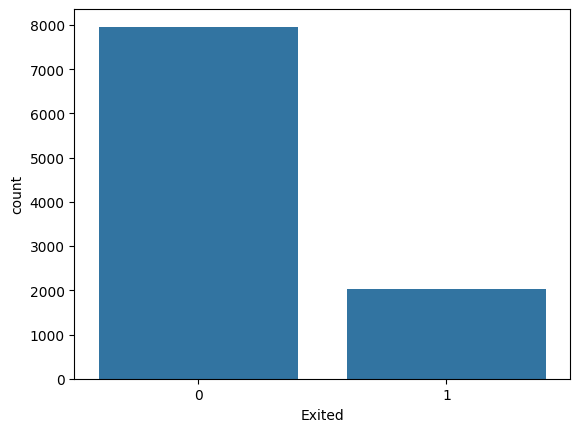

In [10]:
sns.countplot(x=y)

In [11]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [27]:
!pip install imbalanced-learn

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
ros=RandomOverSampler(random_state=0)

In [31]:
x_res,y_res=ros.fit_resample(x,y)

In [32]:
y_res.value_counts()

,count
Exited,
1,7963
0,7963


In [12]:
#Normalize

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [14]:
x_scaled=ss.fit_transform(x)
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [15]:
#Cross Validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0,test_size=0.25)

In [16]:
x_test.shape

(2500, 8)

In [17]:
from sklearn.neural_network import MLPClassifier



In [18]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=0,max_iter=100,activation='relu')

In [19]:
ann.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [20]:
y_pred=ann.predict(x_test)

In [22]:
y_test.value_counts()

,count
Exited,
0,1991
1,509


In [21]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report,accuracy_score

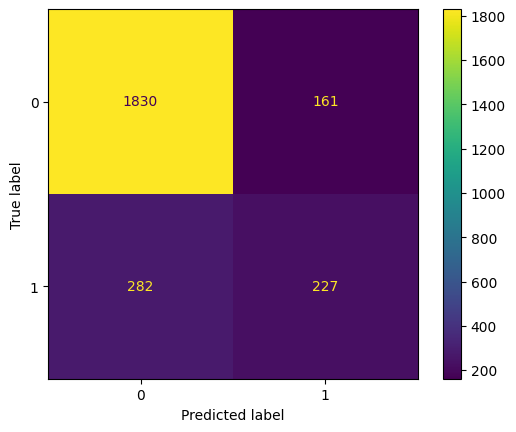

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [25]:
accuracy_score(y_test,y_pred)

0.8228

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1991
           1       0.59      0.45      0.51       509

    accuracy                           0.82      2500
   macro avg       0.73      0.68      0.70      2500
weighted avg       0.81      0.82      0.81      2500



In [33]:
#Improvement
x_scaled=ss.fit_transform(x_res)
x_scaled

array([[-0.29877723,  0.08418894, -1.01840607, ...,  0.6512495 ,
         1.08223556,  0.00817382],
       [-0.4103938 , -0.01032629, -1.36135608, ..., -1.53550983,
         1.08223556,  0.20261687],
       [-1.48597169,  0.08418894,  1.03929402, ...,  0.6512495 ,
        -0.92401325,  0.22674468],
       ...,
       [-0.84671313,  1.02934128,  0.01044398, ...,  0.6512495 ,
        -0.92401325,  1.28878188],
       [-0.96847667,  0.65128034, -0.67545605, ..., -1.53550983,
         1.08223556, -1.21851316],
       [-1.5874413 ,  0.74579558,  1.03929402, ...,  0.6512495 ,
         1.08223556,  1.42417217]])

In [34]:
#Cross Validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_res,random_state=0,test_size=0.25)

In [37]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=0,max_iter=100,activation='relu')

In [38]:
ann.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [39]:
y_pred=ann.predict(x_test)

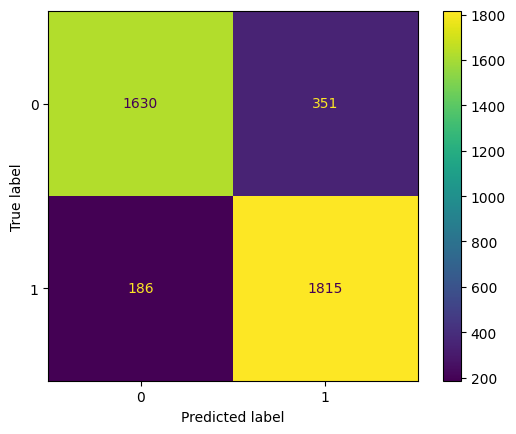

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [41]:
accuracy_score(y_test,y_pred)

0.865143144148669

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1981
           1       0.84      0.91      0.87      2001

    accuracy                           0.87      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.87      0.86      3982

